<a href="https://colab.research.google.com/github/Cauet-Menezes/Inteligencia_Artificial/blob/main/PCV_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nomes: Cauet Corrêa de Menezes, Gustavo Carvalho Alves dos Santos

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plot

def carregar_cidades(nome_arquivo):
    cidades = []
    with open(nome_arquivo, 'r') as arquivo:
        for linha in arquivo:
            linha = linha.strip()
            if linha and not linha.startswith('#'):
                cidades.append(linha)
    return cidades

def carregar_distancias(nome_arquivo):
    matriz_distancias = []
    with open(nome_arquivo, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith('#'):
                row = list(map(int, line.strip().split()))
                matriz_distancias.append(row)
    return matriz_distancias

def calcular_distancia_total(rota, matriz_distancias):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += matriz_distancias[rota[i]][rota[i+1]]
    distancia += matriz_distancias[rota[-1]][rota[0]]  # Considerando o retorno à cidade de origem
    return distancia

def gera_populacao_inicial(cidades, tamanho_populacao):
    populacao = []
    for _ in range(tamanho_populacao):
        rota = list(np.random.permutation(len(cidades)))
        populacao.append(rota)
    return populacao

def selecao_torneio(populacao, distancias_rotas, k=3):
    individuos_escolhidos = random.sample(range(len(populacao)), k)
    distancias_escolhidas = [distancias_rotas[i] for i in individuos_escolhidos]
    return populacao[individuos_escolhidos[distancias_escolhidas.index(min(distancias_escolhidas))]]

def crossover(pai1, pai2):
    ponto1 = random.randint(0, len(pai1) - 1)
    ponto2 = random.randint(0, len(pai1) - 1)
    if ponto1 > ponto2:
        ponto1, ponto2 = ponto2, ponto1
    filho = [None] * len(pai1)
    filho[ponto1:ponto2+1] = pai1[ponto1:ponto2+1]

    # Preencher o resto do filho com as cidades do pai2 que ainda não foram usadas
    posicao_filho = (ponto2 + 1) % len(pai1)
    for cidade in pai2:
        if cidade not in filho:
            filho[posicao_filho] = cidade
            posicao_filho = (posicao_filho + 1) % len(pai1)
    return filho

def mutacao(filho, probabilidade_mutacao=0.02):
    if random.random() < probabilidade_mutacao:
        indice1 = random.randint(0, len(filho) - 1)
        indice2 = random.randint(0, len(filho) - 1)
        while indice1 == indice2:
            indice2 = random.randint(0, len(filho) - 1)
        filho[indice1], filho[indice2] = filho[indice2], filho[indice1]
    return filho

def algoritmo_genetico(matriz_distancias, tamanho_populacao=50, numero_geracoes=250, probabilidade_mutacao=0.02):
    cidades = list(range(len(matriz_distancias)))
    populacao = gera_populacao_inicial(cidades, tamanho_populacao)

    dist_inicial = [calcular_distancia_total(individuo, matriz_distancias) for individuo in populacao]
    dist_media_inicial = np.mean(dist_inicial)

    melhor_rota = None
    melhor_distancia = float('inf')  # Inicialmente definido como infinito
    distancias_populacao = [calcular_distancia_total(individuo, matriz_distancias) for individuo in populacao]

    # Achar a melhor rota da população inicial
    melhor_rota = populacao[np.argmin(distancias_populacao)]
    melhor_distancia = np.min(distancias_populacao)

    historico_medio_distancias = []
    historico_melhor_distancia = []

    for geracao in range(numero_geracoes):
        nova_populacao = []
        for _ in range(tamanho_populacao):
            pai1 = selecao_torneio(populacao, distancias_populacao)
            pai2 = selecao_torneio(populacao, distancias_populacao)
            filho = crossover(pai1, pai2)
            filho = mutacao(filho, probabilidade_mutacao)
            nova_populacao.append(filho)

        populacao = nova_populacao
        distancias_populacao = [calcular_distancia_total(individuo, matriz_distancias) for individuo in populacao]

        # Atualizar a melhor rota e melhor distância se necessário
        for i in range(len(populacao)):
            distancia_atual = distancias_populacao[i]
            if distancia_atual < melhor_distancia:
                melhor_distancia = distancia_atual
                melhor_rota = populacao[i]

        dist_media = np.mean(distancias_populacao)
        historico_medio_distancias.append(dist_media)
        historico_melhor_distancia.append(melhor_distancia)

    # Distância média da população final
    dist_media_final = np.mean(distancias_populacao)

    # Gráfico de convergência
    plot.plot(historico_medio_distancias, label='Distância média da população')
    plot.plot(historico_melhor_distancia, label='Melhor distância (indivíduo)')
    plot.title('Gráfico de Convergência da População')
    plot.xlabel('Geração')
    plot.ylabel('Distância')
    plot.legend()
    plot.show()

    return melhor_rota, melhor_distancia, dist_media_final, dist_media_inicial


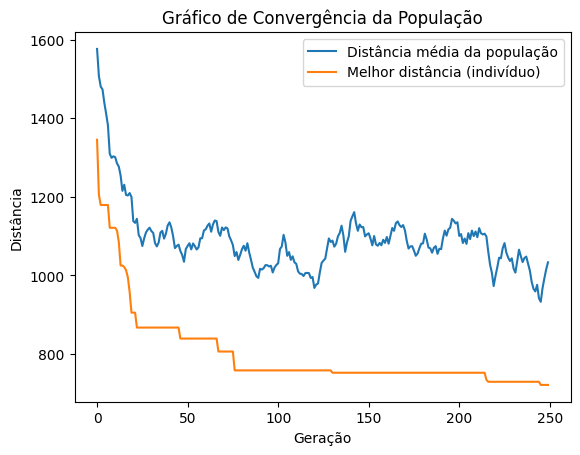

Melhor rota encontrada: ['Berlin', 'Istanbul', 'London', 'Paris', 'Azores', 'Juneau', 'San Francisco', 'Honolulu', 'Chicago', 'Panama City', 'Rio de Janeiro', 'Santiago', 'Buenos Aires', 'Capetown', 'Cairo', 'Montreal', 'New Orleans', 'Mexico City', 'New York', 'Seattle', 'Guam', 'Melbourne', 'Sydney', 'Tokyo', 'Shanghai', 'Manila', 'Bombay', 'Baghdad', 'Moscow', 'Rome']
Distância total percorrida (considerando o retorno à cidade de origem): 721.00 km
Distância média da população inicial: 1033.04 km
Distância média da população final: 1671.24 km


In [31]:
# Carregar cidades e distâncias dos arquivos
nome_cidades = carregar_cidades('ha30_name.txt')
matriz_distancias = carregar_distancias('ha30_dist.txt')

# Executar o algoritmo genético
melhor_rota, melhor_distancia, dist_media_inicial, dist_media_final = algoritmo_genetico(matriz_distancias)

# Exibir a melhor rota e distância
nome_melhor_rota = [nome_cidades[i] for i in melhor_rota]

print("Melhor rota encontrada:", nome_melhor_rota)
print(f"Distância total percorrida (considerando o retorno à cidade de origem): {melhor_distancia:.2f} km")
print(f"Distância média da população inicial: {dist_media_inicial:.2f} km")
print(f"Distância média da população final: {dist_media_final:.2f} km")



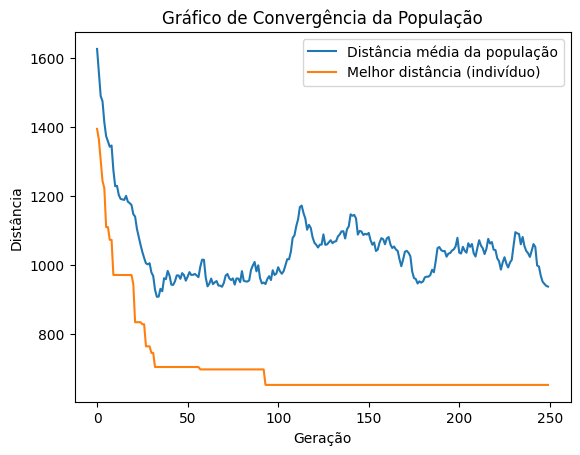

Melhor rota encontrada: ['Santiago', 'Rio de Janeiro', 'Panama City', 'Mexico City', 'New Orleans', 'Chicago', 'New York', 'Montreal', 'San Francisco', 'Seattle', 'Juneau', 'Honolulu', 'Melbourne', 'Shanghai', 'Tokyo', 'Guam', 'Manila', 'Sydney', 'Bombay', 'Rome', 'Moscow', 'Berlin', 'Istanbul', 'Baghdad', 'Cairo', 'London', 'Paris', 'Azores', 'Capetown', 'Buenos Aires']
Distância total percorrida (considerando o retorno à cidade de origem): 651 km
Distância média da população inicial: 1702.84 km
Distância média da população final: 936.32 km


In [32]:
# Carregar cidades e distâncias dos arquivos
nome_cidades2 = carregar_cidades('uk12_name.txt')
matriz_distancias2 = carregar_distancias('uk12_dist.txt')

# Executar o algoritmo genético
melhor_rota, melhor_distancia, dist_media_final, dist_media_inicial = algoritmo_genetico(matriz_distancias)

# Exibir a melhor rota e distância
nome_melhor_rota = [nome_cidades[i] for i in melhor_rota]

print("Melhor rota encontrada:", nome_melhor_rota)
print(f"Distância total percorrida (considerando o retorno à cidade de origem): {melhor_distancia} km")
print(f"Distância média da população inicial: {dist_media_inicial:.2f} km")
print(f"Distância média da população final: {dist_media_final:.2f} km")
